# İlaç Sınıflandırma Problemi ve Veri Analizi

### Verisetiyle ilgili genel bilgilendirme;
*Bu veri setinde her bir satır gözlem yapılan birer kan testi sonucunu, dolayısıyla farklı birer bireyi temsil etmektedir. Her bir sütunda ise bireylerin yaş, cinsiyet, kolesterol gibi verileri kaydedilmiştir.*

200 adet satır ve 6 adet sütun mevcuttur.

**Sütunlar;**
*   Age: Bireylerin yaş bilgisi.
*   Sex: Cinsiyet verisi.
*   Blood Pressure Levels (BP): Kan basınç değeri.
*   Cholesterol Levels: Kolesterol verisi.
*   Na to Potassium Ratio: Kandaki Sodyum/Potasyum oranı.
*   Drug: Bireyin kullandığı ilaç.(Tahmin edilecek veri(y değeri))



*Burada karşımızda Tahmine Dayalı Gözetimli Analiz(Supervised Predictive Analysis) problemi bulunmaktadır.
İzlenecek adımlar için şema:*

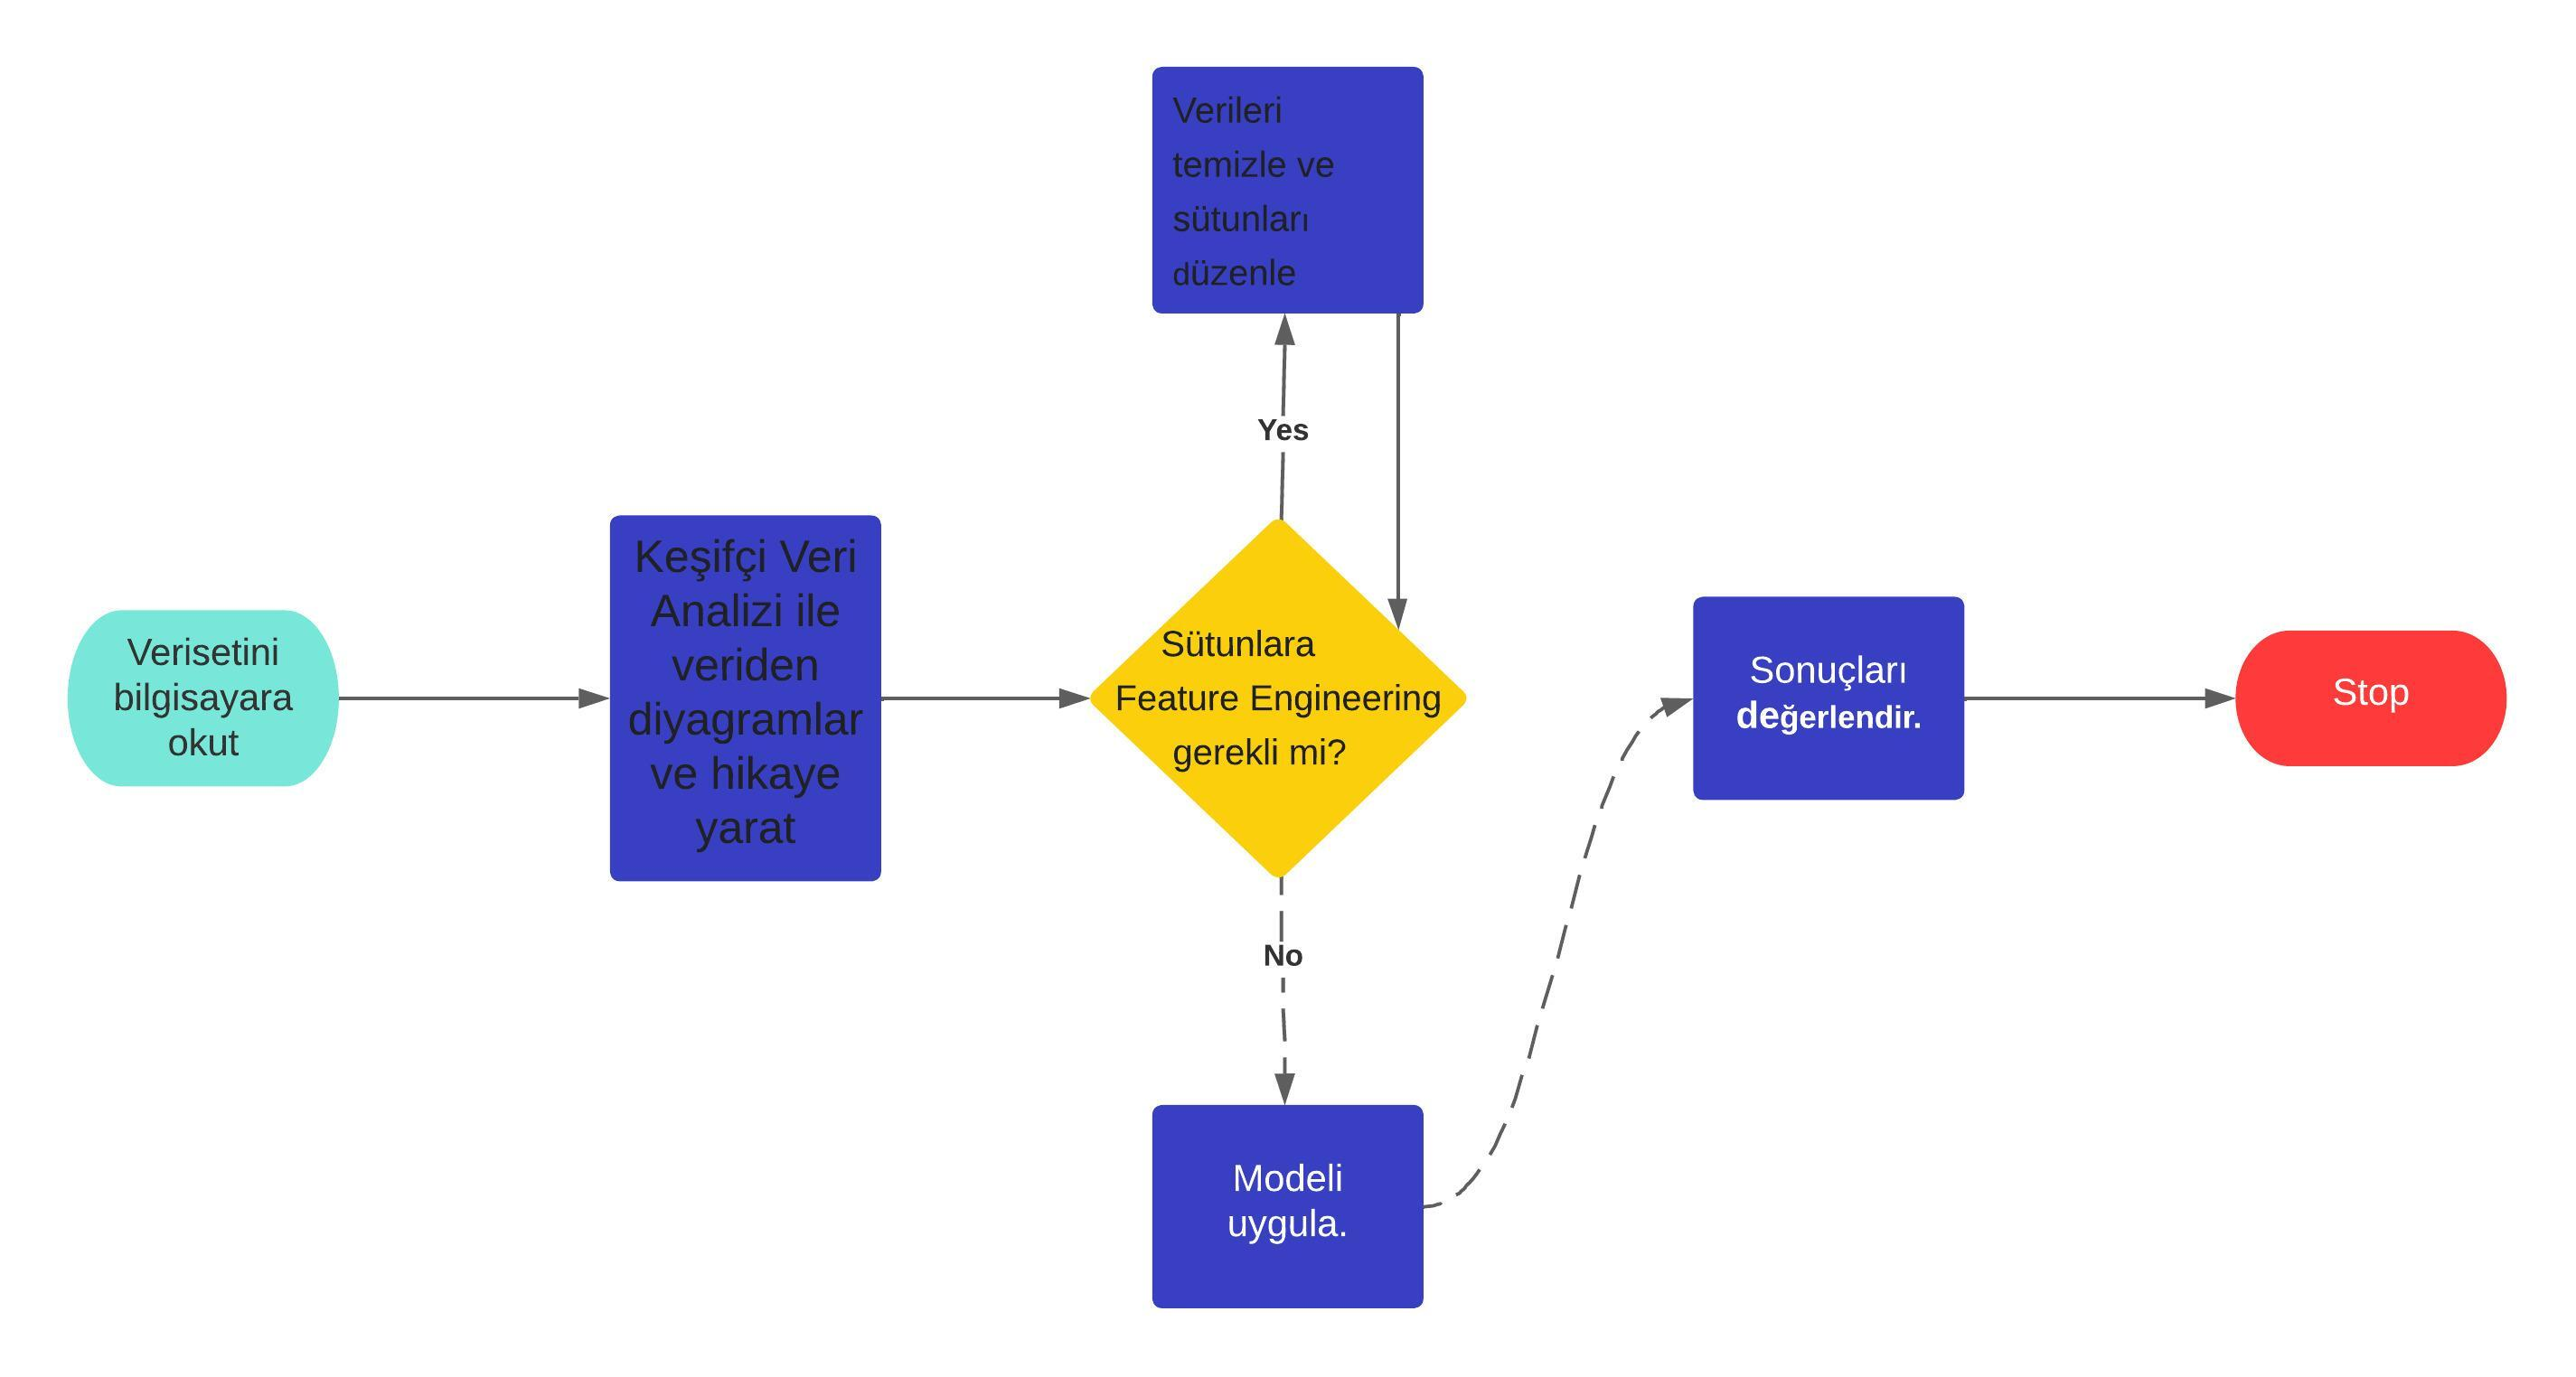

In [1]:
#Verileri bilgisayara okutma(import)
import pandas as pd
import numpy as np
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Keşifçi Veri Analizi(Exploratory Data Analysis)

In [2]:
#Veri hakkında genel bilgi.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
# Hedef sütundaki farkli degerler ve bu degerlerin adedi.
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<ipython-input-4-5db7c3d9f8f2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["Na_to_K"]))


<Axes: xlabel='Na_to_K', ylabel='Density'>

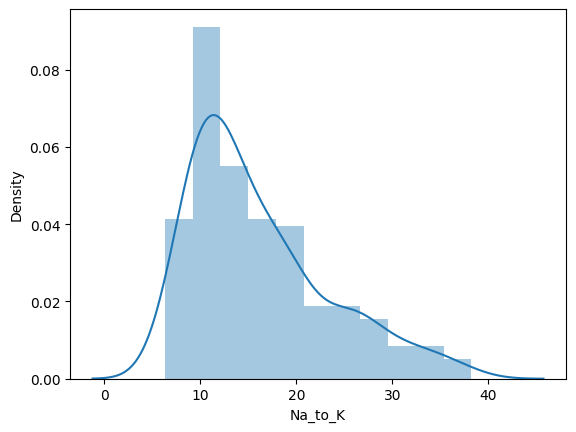

In [4]:
import seaborn as sns
# Sodyum/Potasyum orani sutununun her bir gozlem icin deger karsilastirmasi.
sns.distplot((df["Na_to_K"]))

<ipython-input-6-d82ac7a793ef>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df["Na_to_K"]))


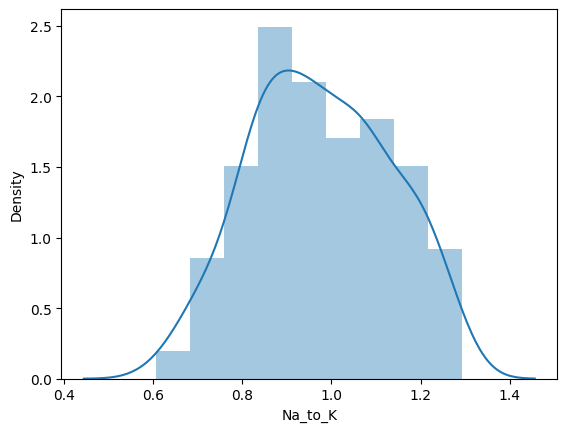

In [6]:
## Veriyi modele daha uygun hale getirebilmek adina bazen sutunlarin Normal Dagilim(Gaussian Distrubition)'a yaklasmasi gerekir.
## Normal Dagilim yada Gauss Dagilimi Makine Ogrenmesi Modelleri'nin sutunlardaki degisimleri daha kolay farkedebilmesi icin bir nevi "duzeltici gorevi gorur".
## Burada uyguladigim teknikte, her bir satir icin "Na_to_K" sutununun 10 tabanli logaritmasini almis bulunduk.
## Yukaridaki diyagram ve asagidaki diyagram arasindaki farka bakilirsa nispeten Gauss Can Egrisi imajina daha yakinlasmistir.
sns.distplot(np.log(df["Na_to_K"]))
df["Na_to_K"] = np.log(df["Na_to_K"])

In [7]:
# Blood Pressure(Kan basinci) sutununun veri setindeki farkli degerleri ve sayilari.
df["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [8]:
## Kolesterol sutununun veri setindeki degerleri ve sayilari.
df["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

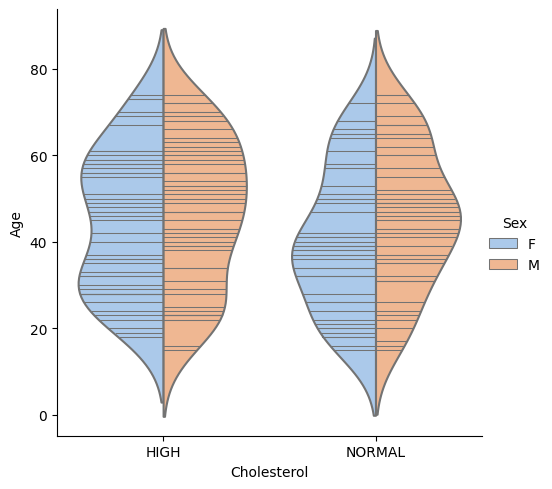

In [24]:
## Bu diyagramda yasa ve cinsiyete gore kolesterol degerlerini kiyasladim.
## Goruldugu uzere yuksek kolesterol kadinlarda 25 ve 35'li degerlerde iki peak vardir. Erkeklerde ise peak 40 civarindadir ve tek tepelidir.
## F degeri Female(kadin), M degeri Male(erkek).
sns.catplot(data=df, x="Cholesterol", y="Age",hue='Sex' ,kind="violin", inner="stick", split=True, palette="pastel")

### Feature Engineering

In [29]:
## Bu degerleri Makine Ogrenmesi Modeline uygun hale getirmek ve bilgisayarin okuyabilmesini saglamak icin Feature Engineering yapiyorum
## Burada BP degerlerine HIGH,NORMAL ve LOW olmak uzere sirali olarak deger atadim.
## Kolesterol degerlerine HIGH ise 1, NORMAL ise 0 degeri atadim.
## Bu olusturdugum python sozluk yapilarini birer fonksiyon ile veri setine atayacagim.
BP_map= {
    "HIGH":3,
    "NORMAL":2,
    "LOW":1
}
Cholesterol_map={
    "HIGH":1,
    "NORMAL":0

}

In [30]:
## Degerlerin veri setine atanmasi
df.loc[:,'BP'] = df['BP'].map(BP_map)
df.loc[:,'Cholesterol'] = df['Cholesterol'].map(Cholesterol_map)
df.head()

<ipython-input-30-536680551d25>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'BP'] = df['BP'].map(BP_map)
<ipython-input-30-536680551d25>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Cholesterol'] = df['Cholesterol'].map(Cholesterol_map)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,3,1,1.173403,DrugY
1,47,M,1,1,0.944714,drugC
2,47,M,1,1,0.838943,drugC
3,28,F,2,1,0.719724,drugX
4,61,F,1,1,1.062210,DrugY


In [31]:
## Yukarida oldugu gibi istatiksel modellerin sutunlari okuyabilmesi icin metin degeri olan cinsiyet(Sex) sutununa 1 ve 0 degerleri atadim.
df = pd.concat([df["Drug"],(pd.concat([pd.get_dummies(df["Sex"]),df.drop("Drug",axis=1)],axis=1).drop("Sex",axis=1))],axis=1)
df.head()

,Drug,F,M,Age,BP,Cholesterol,Na_to_K
0,DrugY,1,0,23,3,1,1.173403
1,drugC,0,1,47,1,1,0.944714
2,drugC,0,1,47,1,1,0.838943
3,drugX,1,0,28,2,1,0.719724
4,DrugY,1,0,61,1,1,1.062210


### Supervised Machine Learning(Gozetimli Makine Ogrenmesi)

*Burada problemimiz bir siniflandirma yani Classification problemidir. Cunku tahmin edilmesi gereken sutun olan 'Drug' sutunu bir sayi degeri degil "Kategorik" yani basitce metin verisidir. Dolayisiyla bu Supervised Classification Modeli'ni(Gozetimli Siniflandirma Algorithm) olusturma amacimiz; modelin elimizdeki veriden hangi yas, cinsiyet ve kolesterol degerleri bulunan bireylerin hangi ilaci kullanacagini ogretmek ve elimize gelen bir sonraki hasta icin otomatik olarak tahmin etmektir.*

*Bu modelin ornek kullanimi icin Yapay Zeka Destekli Hastanelere bakilabilir. Neredeyse ayni kullanim bulunan bu tarz hastanelerde hasta yasini, cinsiyetini ve kan degerlerini bir bilgisayar veya dokunmatik ekran yardimiyla sisteme girer, sistem de hastaliginin ne oldugunu veya hangi ilaclarin kullanilmasi gerektigini hicbir doktor olmadan tavsiye eder. Iste kuracagimiz bu basit olcekteki modelin gercek hayat uygulamasi budur.*

*Burada python yazilim diline sonradan yuklenebilen bir kutuphane olan pyCaret yani otomatik Makine Ogrenmesi kutuphanesini kullandim. Bu kutuphane bizim yerimize yaklasik 15 Istatistiksel Makine Ogrenmesi Algoritmasi'ni verisetine uygular ve bununla kalmayip en iyi sonuc verenleri bizim yerimize secer. python yazilim dilinde kutuphane kullanarak dogruluk yuzdesi ve diger metrikleri de tek tek elle degil birkac satirda gozler onune sunabiliriz.*

In [33]:
#!pip install pycaret
from pycaret.classification import *
exp_name = setup(data=df,target="Drug")
best_model = compare_models()

,Description,Value
0,Session id,3007
1,Target,Drug
2,Target type,Multiclass
3,Target mapping,"DrugY: 0, drugA: 1, drugB: 2, drugC: 3, drugX: 4"
4,Original data shape,"(200, 7)"
5,Transformed data shape,"(200, 7)"
6,Transformed train set shape,"(140, 7)"
7,Transformed test set shape,"(60, 7)"
8,Numeric features,6
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9929,0.9962,0.9929,0.9964,0.9929,0.9899,0.9906,0.0810
lightgbm,Light Gradient Boosting Machine,0.9929,1.0000,0.9929,0.9964,0.9929,0.9899,0.9906,0.1810
gbc,Gradient Boosting Classifier,0.9857,0.9958,0.9857,0.9929,0.9857,0.9799,0.9812,1.2940
xgboost,Extreme Gradient Boosting,0.9857,1.0000,0.9857,0.9929,0.9864,0.9800,0.9813,0.3280
rf,Random Forest Classifier,0.9786,0.9993,0.9786,0.9779,0.9746,0.9693,0.9713,0.5770
et,Extra Trees Classifier,0.9357,0.9989,0.9357,0.9379,0.9303,0.9067,0.9115,0.4470
lda,Linear Discriminant Analysis,0.9286,0.9928,0.9286,0.9257,0.9173,0.8948,0.9017,0.0830
ada,Ada Boost Classifier,0.8429,0.9638,0.8429,0.7386,0.7809,0.7662,0.7821,0.2730
lr,Logistic Regression,0.8286,0.9597,0.8286,0.7988,0.7971,0.7336,0.7527,0.5510
nb,Naive Bayes,0.8000,0.9491,0.8000,0.8940,0.8032,0.7409,0.7723,0.0800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

***Tesekkurler, Cansu YILDIRIM***